<a href="https://colab.research.google.com/github/killianraes/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report on eye blinking predictions

## Basic setup

Importing libraries.

In [0]:
%matplotlib inline
import pandas as pd


Updating the mlxtend library

In [0]:
pip install git+git://github.com/rasbt/mlxtend.git

Loading in the datasets

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

Making copy's of the datasets just in case something goes wrong

In [0]:
data_train = trainset.copy()
data_test = testset.copy()

## Preprocessing

The data was first explored by looking at the first 5 rows of the datasets


In [0]:
data_train.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,label
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23,1
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46,0
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79,0
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10,0
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79,1


In [0]:
data_test.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4,index
0,4296.41,4040.51,4253.33,4124.10,4341.54,4618.46,4075.38,4601.03,4183.59,4204.10,4197.44,4268.72,4598.46,4342.56,0
1,4291.28,3994.36,4247.18,4102.56,4328.21,4616.41,4057.44,4622.56,4198.46,4227.69,4190.77,4260.51,4593.33,4337.95,1
2,4299.49,4019.49,4269.74,4116.41,4344.10,4635.38,4067.18,4627.18,4211.28,4233.33,4202.56,4280.51,4596.92,4350.26,2
3,4280.00,4004.62,4263.59,4120.51,4323.59,4603.08,4040.51,4589.23,4174.87,4212.82,4192.82,4271.79,4608.72,4344.10,3
4,4317.44,3968.72,4260.51,4101.54,4341.54,4600.51,4071.28,4607.69,4191.28,4231.28,4199.49,4282.05,4592.31,4372.82,4


This revealed that scaling the data was necessary. Before scaling however, the label column from the training data was extracted since it would otherwise be seen as a feature during the scaling process. Standardscaler was used to scale the features.

In [0]:
from sklearn.preprocessing import StandardScaler

X_train = data_train.copy()
y_train = X_train.pop('label')

feature_scaler = StandardScaler()
feature_scaler.fit(X_train)

X_train = pd.DataFrame(feature_scaler.transform(X_train))
X_train.columns = data_train.columns[:-1]

X_train.head()


,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,-0.018351,-0.396476,0.677912,-0.277047,0.733699,0.167400,1.330668,0.454721,0.093570,-0.068336,0.418469,0.026714,-0.156365,0.252992
1,0.052070,-0.791842,-0.136210,0.346482,-0.434286,-0.259658,0.007585,-1.609301,-0.482085,-0.276922,-0.232997,0.235973,0.060820,-0.037576
2,0.574178,0.222036,0.061066,-0.002733,-0.496011,-0.373355,0.031954,-0.716795,-0.482085,-0.381214,-1.894254,0.392280,0.091976,0.322059
3,2.972354,3.177226,5.588146,5.335202,6.480134,7.221060,4.638614,6.311759,6.199439,6.193291,4.834001,5.588622,3.349453,2.812530
4,1.293521,-1.135609,0.135164,-0.975478,-0.496011,-0.117120,1.208346,-0.131037,0.554655,0.505527,1.911632,1.776139,1.782573,1.401236


After scaling the training data, the test data was scaled as well. Herefore the exact same Standardscaler which was fitted on the training data was used. However, before scaling the index column was extracted to a different DataFrame to prevent it from being seen as a feature and being scaled.

In [0]:
X_test = data_test.copy()
index = X_test.pop('index')

X_test = pd.DataFrame(feature_scaler.transform(X_test))
X_test.columns = data_test.columns[:-1]

X_test.head()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,-0.103077,1.046608,-0.506702,0.072168,-0.004007,-0.088835,0.154276,-0.772271,-0.971812,-1.346811,-0.169859,-0.495161,-0.202948,-0.466549
1,-0.244195,-0.499673,-0.802616,-0.975478,-0.802839,-0.202532,-0.702932,0.398702,-0.136692,-0.146683,-0.443319,-0.913170,-0.358124,-0.590924
2,-0.018351,0.342321,0.282880,-0.301852,0.149407,0.849583,-0.237536,0.649974,0.583297,0.140249,0.040053,0.105122,-0.249531,-0.258808
3,-0.554489,-0.155906,-0.013033,-0.102439,-1.079704,-0.941841,-1.511881,-1.414048,-1.461540,-0.903186,-0.359272,-0.338853,0.107403,-0.425001
4,0.475423,-1.358756,-0.161230,-1.025087,-0.004007,-1.084378,-0.041630,-0.410047,-0.539931,0.035956,-0.085812,0.183531,-0.388978,0.349848


## Support vector machines

Support vector machines allow us to predict the class of a certain sample based on the parameters of the sample. Tho achieve this, a model is trained that separates the classes linearly based on their feature values. This is shown in the plot below where the orange points represent class 1 and the blue points class 0. The x- and y-axis show two features. This plot shows that the classes are linearly separable by multiple lines.

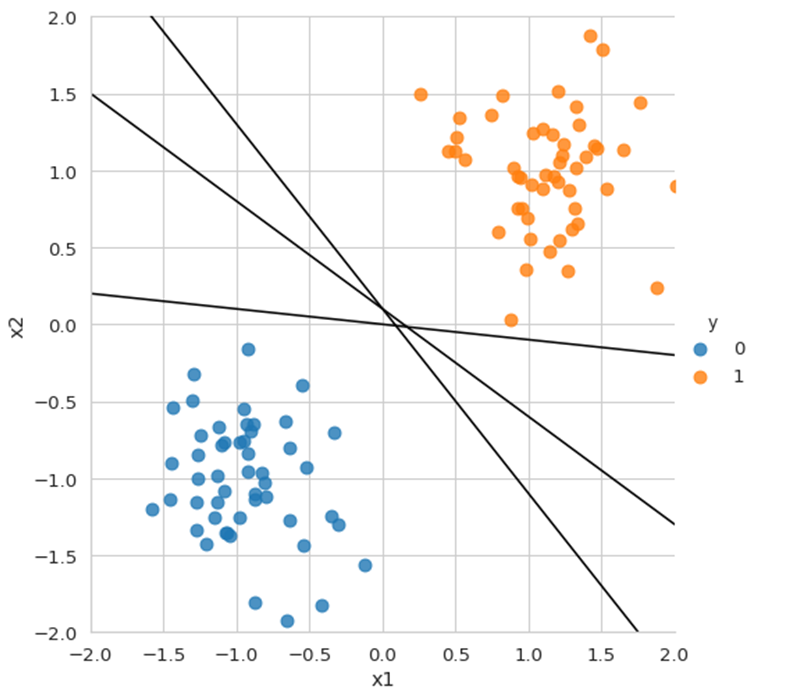

In order to find the best separator, a cost function is assigned which the model tries to keep as low as possible. The plot below represents the cost function with the orange line representing class 1 and the blue line class 0. On the x-axis the prediction of our model is represented and on the y-axis the attribution of a prediction to the cost function.

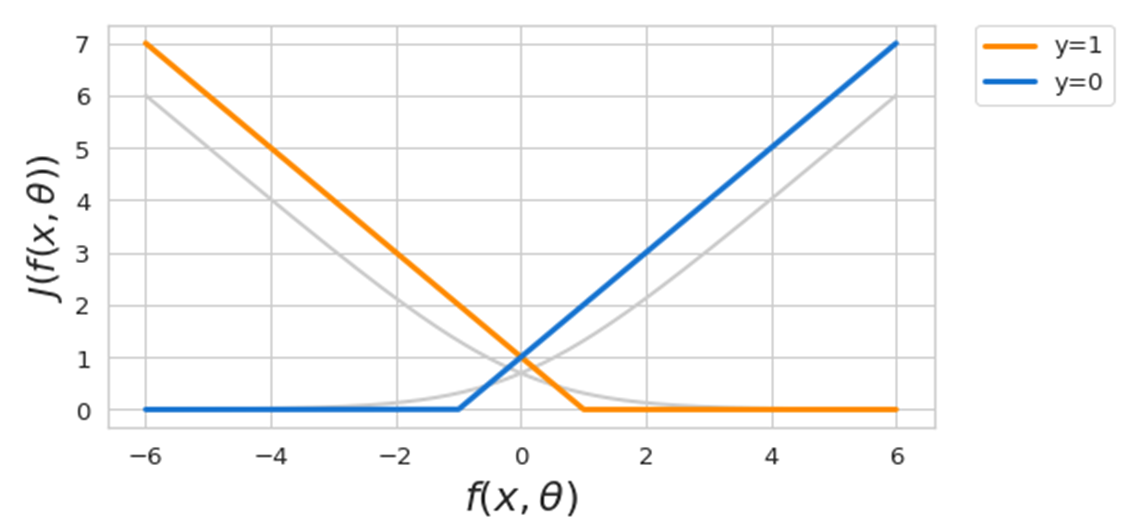

When the model predicts correctly there is no attribution to the cost function. This is also the case when the model 'overshoots' the actual value (e.g. when the actual value is 1 and the model predicts 1 or higher, or whent the actual value is -1 and the model predicts -1 or lower). Furthermore, we can see that the attribution to the cost function increases linearly in function of the misprediction. This means that when the actual value is 1 and the model predicts e.g. 0.5 that this will result in an attribution to the cost function and that this cost will increase linearly the lower the prediction is. The same happens for an actual value of -1 and a prediction higher than one.

By minimizing the cost function, the optimal separation between classes can be calculated

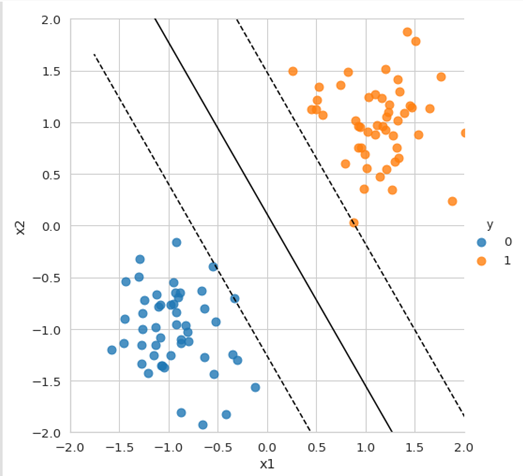


If we would now present the model with an unseen sample (e.g. x=1.0, y=1.5), the model would be able to assign a class (class 1) to this sample based on the previously seen data

## SVM-model

First, I tried to compare a range of machine learning algorithms in their basic version.

>dec_tr 0.743 (0.028)
>log_re 0.655 (0.021)
>SVM 0.886 (0.013)
>nai_ba 0.668 (0.030)
>K_nei 0.932 (0.010)
>Ran_for 0.921 (0.022)
>XGB 0.873 (0.020)


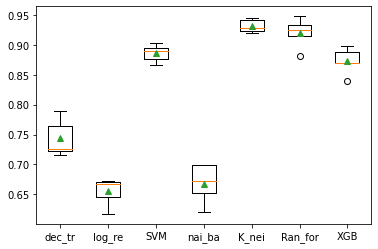

In [0]:
#support vector machines
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from mlxtend.classifier import StackingClassifier

models = dict()
models['dec_tr'] = DecisionTreeClassifier()
models['log_re'] = LogisticRegression()
models['SVM'] = SVC()
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier()
models['Ran_for'] = RandomForestClassifier()
models['XGB'] = XGBClassifier()

results = list()
names = list()
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, scoring = 'roc_auc')
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' %(name, np.mean(scores), np.std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

This plot shows the results of the algorithm comparisson. We can see that the bast basemodel is K-nearest neighbors (0.932) colosely followed by random forests (0.921). We also see that SVM performs decently, but is heavily outperformed by the two previously mentioned algorithms mentioned before.

Next, i used gridsearchcv to optimise the hyperparameters gamma and C. C is a regularisation parameter that regulates the complexity of the model. The higher this value, the more complex the model will be. This parameter is required to prevent overfitting (the model might become so complex that it fits the training data perfectly while it performs bad on the test data). Gamma has somewhat the same effect. The higher gamma becomes, the more the model tries to find the perfect fit for the data it has been fed, possibly leading to overfitting. Thus, it is important to find the optimal value for both these parameters which leads to the perfect tradeoff between model complexity and overfitting.

In [0]:
##Support vector machine
from sklearn.model_selection import GridSearchCV
model = SVC(random_state=0)
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gamma = ['scale', 'auto', 0.00001, 0.0001, 0.001, 0.01, 0.1]
params = {'C': C,
          'gamma': gamma}

clf = GridSearchCV(model, param_grid=params, cv=5)
best_params = clf.fit(X_train, y_train)

print('Best C:', best_params.best_estimator_.get_params()['C'])
print('Best gamma:', best_params.best_estimator_.get_params()['gamma'])

Best C: 100
Best gamma: 0.1


As you can see, a C-value of 100 and a gamma of 0.1 should prove to be optimal for our dataset. In order to confirm this the auc-score was calculated for the optimised SVM-model and compared to the same models it had previously been compared to. Important to note is that all of these models had been optimised as well, using GridSearch.

>dec_tr 0.754 (0.015)
>log_re 0.655 (0.022)
>SVM 0.956 (0.016)
>nai_ba 0.668 (0.030)
>K_nei 0.935 (0.016)
>Ran_for 0.907 (0.020)
>XGB 0.914 (0.015)


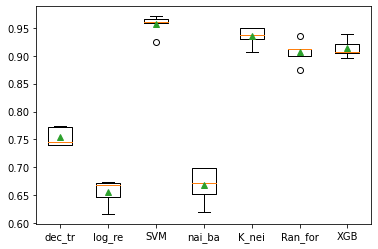

In [0]:
models = dict()
models['dec_tr'] = DecisionTreeClassifier(max_depth=25, 
                                          max_features=10, 
                                          random_state=0)
models['log_re'] = LogisticRegression(C = 0.5, 
                                      random_state=0)
models['SVM'] = SVC(C = 100,
                    gamma=0.1, 
                    random_state=0)
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier(n_neighbors=2, 
                                       weights='distance', 
                                       algorithm='ball_tree',
                                       p=2)
models['Ran_for'] = RandomForestClassifier(bootstrap= True,
                                           max_depth= 80,
                                           max_features= 'auto',
                                           min_samples_leaf= 3,
                                           min_samples_split= 8,
                                           n_estimators= 100,
                                           random_state=0)
models['XGB'] = XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)

results = list()
names = list()
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, scoring='roc_auc')
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' %(name, np.mean(scores), np.std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Here we can clearly see that the SVM-model (0.956) now outperforms all competitors with the closest persuer being K-nearest neighbors (0.935). Remarkable is that the score for the K-nearest neighbors algorithm did not change and that the score for the random forest actually decreased with optimisation. This leads to believe that misstakes were made during the optimisation of the random forest algoritm which is a potential explanation for why the model maxed out at 0.97401 in the competition.

## Stacking-model

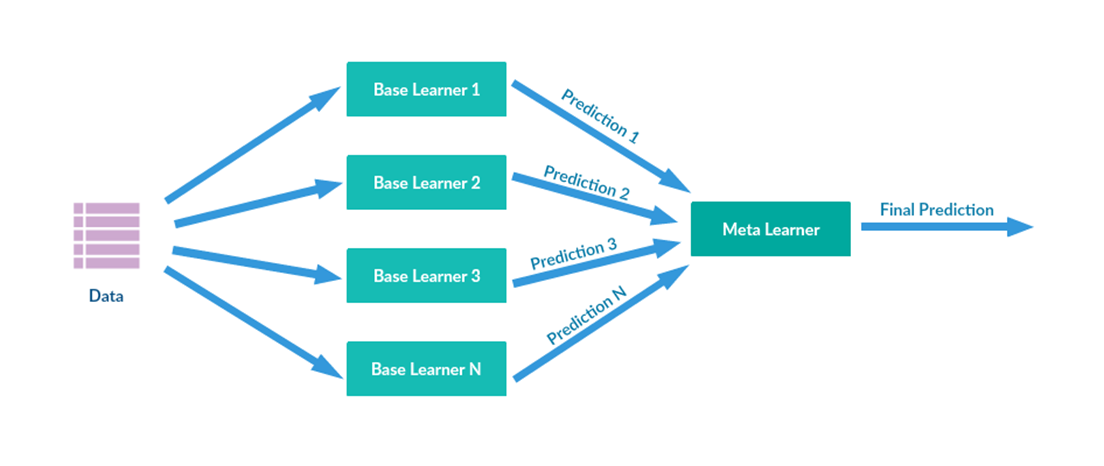

In stacking, the data is used to train base learners, which then make predictions based on the features of the training data. These predictions are then used to train the meta-learner which will make the final predictions.

In [0]:
models = dict()
models['dec_tr'] = DecisionTreeClassifier(max_depth=25, 
                                          max_features=10, 
                                          random_state=0)
models['log_re'] = LogisticRegression(C = 0.5, 
                                      random_state=0)
models['SVM'] = SVC(C = 100,
                    gamma=0.1, 
                    random_state=0)
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier(n_neighbors=2, 
                                       weights='distance', 
                                       algorithm='ball_tree',
                                       p=2)
models['ran_for'] = RandomForestClassifier(bootstrap= True,
                                           max_depth= 80,
                                           max_features= 'auto',
                                           min_samples_leaf= 3,
                                           min_samples_split= 8,
                                           n_estimators= 100,
                                           random_state=0)
models['XGB'] = XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)
predictions = pd.DataFrame()
predictions['label'] = y_train
for name,model in models.items():
  model.fit(X_train, y_train)
  predictions[name] = model.predict(X_train)

predictions.head()

,label,dec_tr,log_re,SVM,nai_ba,K_nei,ran_for,XGB
0,1,1,1,1,1,1,1,1
1,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,1,1,1,1,1,1,1,1


>dec_tr 0.754 (0.015)
>log_re 0.655 (0.022)
>SVM 0.956 (0.016)
>nai_ba 0.668 (0.030)
>K_nei 0.935 (0.016)
>Ran_for 0.907 (0.020)
>XGB 0.914 (0.015)
>stack 0.950 (0.014)


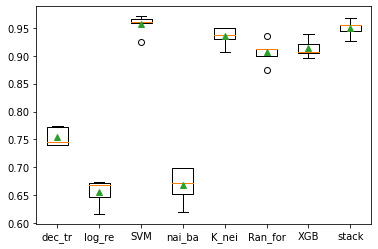

In [0]:
models = dict()
models['dec_tr'] = DecisionTreeClassifier(max_depth=25, 
                                          max_features=10, 
                                          random_state=0)
models['log_re'] = LogisticRegression(C = 0.5, 
                                      random_state=0)
models['SVM'] = SVC(C = 100,
                    gamma=0.1, 
                    random_state=0)
models['nai_ba'] = GaussianNB()
models['K_nei'] = KNeighborsClassifier(n_neighbors=2, 
                                       weights='distance', 
                                       algorithm='ball_tree',
                                       p=2)
models['Ran_for'] = RandomForestClassifier(bootstrap= True,
                                           max_depth= 80,
                                           max_features= 'auto',
                                           min_samples_leaf= 3,
                                           min_samples_split= 8,
                                           n_estimators= 100,
                                           random_state=0)
models['XGB'] = XGBClassifier(learning_rate = 0.2, 
                                     n_estimators=100, 
                                     objective='binary:logistic', 
                                     max_depth=5, 
                                     min_child_weight=3, 
                                     max_delta_step=1, 
                                     subsample=0.8, 
                                     random_state=0)

level_0 = list()
level_0.append(KNeighborsClassifier(n_neighbors=2,
                                    weights='distance',
                                    algorithm='ball_tree',
                                    p=2))
level_0.append(DecisionTreeClassifier(max_depth=25, 
                                      max_features=10, 
                                      random_state=0))
level_0.append(SVC(C = 100, gamma=0.1, random_state=0, probability=True))
level_0.append(RandomForestClassifier(bootstrap= True,
                                      max_depth= 80,
                                      max_features= 'auto',
                                      min_samples_leaf= 3,
                                      min_samples_split= 8,
                                      n_estimators= 100,
                                      random_state=0))
level_0.append(XGBClassifier(learning_rate = 0.2, 
                             n_estimators=100, 
                             objective='binary:logistic', 
                             max_depth=5, 
                             min_child_weight=3,
                             max_delta_step=1, 
                             subsample=0.8, 
                             random_state=0))
level_0.append(LogisticRegression(C = 0.5, 
                                  random_state=0))
level_0.append(GaussianNB())
level_1 = LogisticRegression(random_state=0)

models['stack'] = StackingClassifier(classifiers= level_0, meta_classifier= level_1, use_probas=True)

results = list()
names = list()
for name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, scoring='roc_auc')
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' %(name, np.mean(scores), np.std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

One thing i forgot during the course of the competition, is to check what happens when i leave out the weak models. They much more false results which are used to train the meta-learner. This could lead to wrong predictions by the stacked model. To check what happens (POST COMPETITION!) i leave out the 3 worst performing base level algorithms (decision tree, logistic regression and naive Bayes).

In [0]:
level_0 = list()
level_0.append(KNeighborsClassifier(n_neighbors=2,
                                    weights='distance',
                                    algorithm='ball_tree',
                                    p=2))
level_0.append(SVC(C = 100, gamma=0.1, random_state=0, probability=True))
level_0.append(RandomForestClassifier(bootstrap= True,
                                      max_depth= 80,
                                      max_features= 'auto',
                                      min_samples_leaf= 3,
                                      min_samples_split= 8,
                                      n_estimators= 100,
                                      random_state=0))
level_0.append(XGBClassifier(learning_rate = 0.2, 
                             n_estimators=100, 
                             objective='binary:logistic', 
                             max_depth=5, 
                             min_child_weight=3,
                             max_delta_step=1, 
                             subsample=0.8, 
                             random_state=0))
level_1 = LogisticRegression(random_state=0)

model = StackingClassifier(classifiers= level_0, meta_classifier= level_1, use_probas=True)

scores = cross_val_score(model,X_train, y_train, scoring = 'roc_auc')
print('%.3f (%.3f)' %(np.mean(scores), np.std(scores)))

0.965 (0.014)


Here we can see that the model without the three worst performers actually performs better on the training data. This does not mean that it will actually perform better on the test data, but the fact that this was discovered making use of cross validation leads to believe that this could have improved the predictive capabilities on the test data.

## Predictions

In this part of the notebook the actual predictions are made. To do this we first need to fit our models to the training data. We can then make predictions of what class training samples belong to. To do this we use probabilities because the evaluation metric for the competition was AUC, which performs better with probabilities. (IMPORTANT NOTE: this is something that i forgot to change in my code during the competition. I used the standard scoring method which is accuracy in order to evaluate my models before making submissions. This is obviously a big mistake which did not make a huge difference during this competition since both class 1 and class 0 had a similar amount of samples. This will however make a big difference when unbalanced data is used). To calculate the AUC we only desire to have the probabilities of a prediction being 1. To this end the predictions were stored in a dataframe which was given columnames to make extraction of these probabilities easier.

In [0]:
model = SVC(C = 100, gamma=0.1, random_state=0, probability=True)
model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
SVC_pred = pd.DataFrame()
SVC_pred['index'] = index
SVC_pred['label'] = predictions['1']
print(SVC_pred.head())

   index     label
0      0  0.000001
1      1  0.783306
2      2  0.006151
3      3  1.000000
4      4  1.000000


In [0]:
level_0 = list()
level_0.append(KNeighborsClassifier(n_neighbors=2,
                                    weights='distance',
                                    algorithm='ball_tree',
                                    p=2))
level_0.append(DecisionTreeClassifier(max_depth=25, 
                                      max_features=10, 
                                      random_state=0))
level_0.append(SVC(C = 100, gamma=0.1, random_state=0, probability=True))
level_0.append(RandomForestClassifier(bootstrap= True,
                                      max_depth= 80,
                                      max_features= 'auto',
                                      min_samples_leaf= 3,
                                      min_samples_split= 8,
                                      n_estimators= 100,
                                      random_state=0))
level_0.append(XGBClassifier(learning_rate = 0.2, 
                             n_estimators=100, 
                             objective='binary:logistic', 
                             max_depth=5, 
                             min_child_weight=3,
                             max_delta_step=1, 
                             subsample=0.8, 
                             random_state=0))
level_0.append(LogisticRegression(C = 0.5, 
                                  random_state=0))
level_0.append(GaussianNB())
level_1 = LogisticRegression(random_state=0)

model = StackingClassifier(classifiers= level_0, meta_classifier= level_1, use_probas=True)
model.fit(X_train, y_train)
predictions = pd.DataFrame(model.predict_proba(X_test))
predictions.columns=['0', '1']
stack_pred = pd.DataFrame()
stack_pred['index'] = index
stack_pred['label'] = predictions['1']
print(stack_pred.head())

   index     label
0      0  0.000937
1      1  0.091349
2      2  0.001008
3      3  0.999222
4      4  0.999011


# Comparing predictions

To compare the predictions of both methods a scatterplot will be used.

In [0]:
comparisson = pd.DataFrame()
comparisson['index'] = stack_pred['index']
comparisson['SVM'] = SVC_pred['label']
comparisson['stacking'] = stack_pred['label']

comparisson.head()

,index,SVM,stacking
0,0,0.000001,0.000937
1,1,0.783306,0.091349
2,2,0.006151,0.001008
3,3,1.000000,0.999222
4,4,1.000000,0.999011


First a dataframe was constructed containing both the SVM predictions and the stacking predictions. Next a scatterplot was plotted

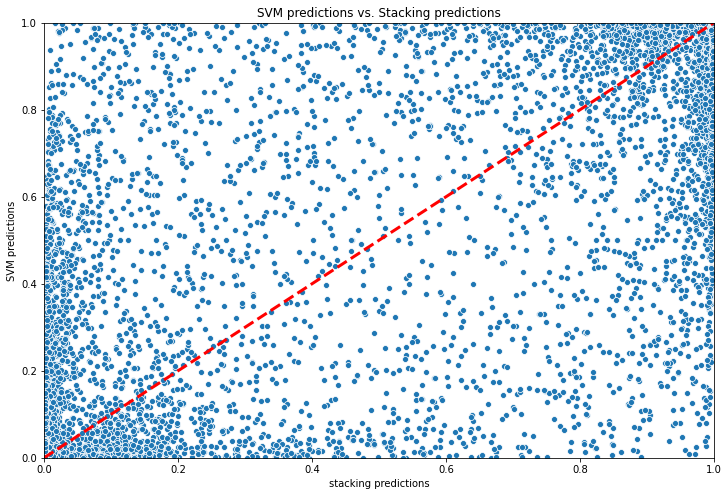

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.scatterplot(data = comparisson, x='stacking', y='SVM')
plt.xlabel('stacking predictions')
plt.ylabel('SVM predictions')
plt.title('SVM predictions vs. Stacking predictions')
plt.xlim(0,1)
plt.ylim(0,1)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=3, scalex=False, scaley=False)
plt.show()

On this scatterplot we can see that both methods predict quite correctly since most of the datapoints can be found near the y=x regression line. This regression line shows where the predictions from both methods are equal. Even though this scatterplot shows that predictions are often similar, we cannot draw conclusions from this plot. In order to better estimate the similarity between the results, the coefficient of determination is calculated below. This coefficient is 0.71 and shows that even though these are two excellent models (see results of AUC score above), they still differ in their predictions quite a bit. The R2 score does however also imply that there are a lot of similarities in their predictions.

In [0]:
from sklearn import metrics
metrics.r2_score(comparisson.SVM, comparisson.stacking)

0.7171349316051556